# Video Games Sales Data
This dataset contains records of popular video games in North America, Japan, Europe and other parts of the world. Every video game in this dataset has at least 100k global sales.

In [105]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
df = pd.read_csv('vgsales.csv', index_col=0)
df = df.rename(str.lower, axis='columns') # change all column names to lower
df.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data Dictionary

| Column        | Explanation                                                                   |
| ------------- | ----------------------------------------------------------------------------- |
| Rank          | Ranking of overall sales                                                      |
| Name          | Name of the game                                                              |
| Platform      | Platform of the games release (i.e. PC,PS4, etc.)                             |
| Year          | Year the game was released in                                                 |
| Genre         | Genre of the game                                                             |
| Publisher     | Publisher of the game                                                         |
| NA_Sales      | Number of sales in North America (in millions)                                |
| EU_Sales      | Number of sales in Europe (in millions)                                       |
| JP_Sales      | Number of sales in Japan (in millions)                                        |
| Other_Sales   | Number of sales in other parts of the world (in millions)                     |
| Global_Sales  | Number of total sales (in millions)                                           |

[Source of dataset](https://www.kaggle.com/gregorut/videogamesales).

Understand your variables


In [84]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,name,11493,"[Wii Sports, Super Mario Bros., Mario Kart Wii..."
1,platform,31,"[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ..."
2,year,39,"[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989...."
3,genre,12,"[Sports, Platform, Racing, Role-Playing, Puzzl..."
4,publisher,578,"[Nintendo, Microsoft Game Studios, Take-Two In..."
5,na_sales,409,"[41.49, 29.08, 15.85, 15.75, 11.27, 23.2, 11.3..."
6,eu_sales,305,"[29.02, 3.58, 12.88, 11.01, 8.89, 2.26, 9.23, ..."
7,jp_sales,244,"[3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.5, 2.9..."
8,other_sales,157,"[8.46, 0.77, 3.31, 2.96, 1.0, 0.58, 2.9, 2.85,..."
9,global_sales,623,"[82.74, 40.24, 35.82, 33.0, 31.37, 30.26, 30.0..."


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16598 non-null  object 
 1   platform      16598 non-null  object 
 2   year          16327 non-null  float64
 3   genre         16598 non-null  object 
 4   publisher     16540 non-null  object 
 5   na_sales      16598 non-null  float64
 6   eu_sales      16598 non-null  float64
 7   jp_sales      16598 non-null  float64
 8   other_sales   16598 non-null  float64
 9   global_sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.9+ MB


Cleaning variables

In [87]:
for column in df.columns:
    print(f'Column {column} has {df[column].isna().sum()} empty values ({df[column].isna().sum() / df.shape[0] * 100:.2f}%)')

Column name has 0 empty values (0.00%)
Column platform has 0 empty values (0.00%)
Column year has 0 empty values (0.00%)
Column genre has 0 empty values (0.00%)
Column publisher has 58 empty values (0.35%)
Column na_sales has 0 empty values (0.00%)
Column eu_sales has 0 empty values (0.00%)
Column jp_sales has 0 empty values (0.00%)
Column other_sales has 0 empty values (0.00%)
Column global_sales has 0 empty values (0.00%)


Number of empty values is very low and in not so important columns.



In [327]:
# removing the final 3 years because of low number of data available
df = df[df['year'] < 2016].reset_index()
# df_temp

In [328]:
# aggregating sales by year
df_temp = df.groupby('year')['global_sales'].agg(['sum', 'count']).reset_index()

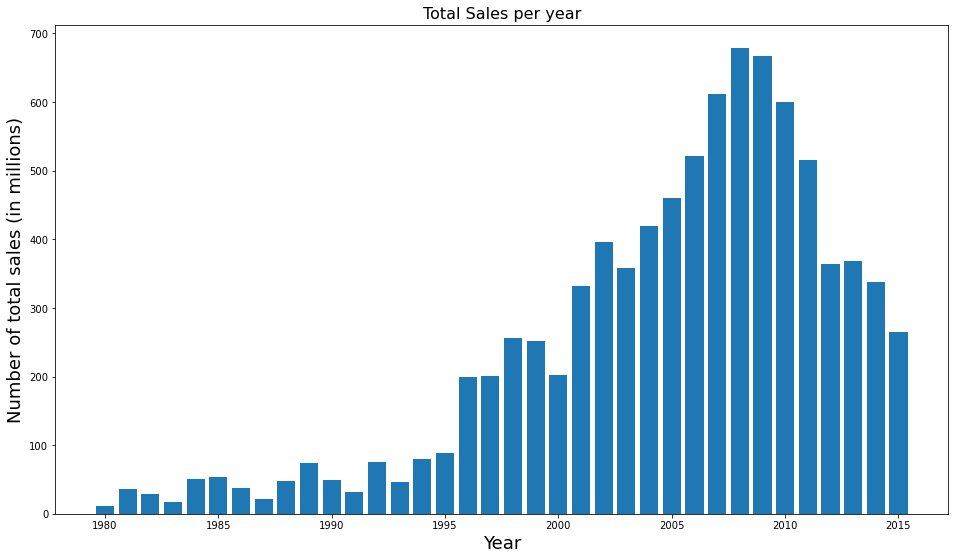

In [329]:
plt.figure(figsize=(16,9))
plt.bar(df_temp['year'], df_temp['sum'])
plt.xlabel('Year', fontdict={'size': 18})
plt.ylabel('Number of total sales (in millions)', fontdict={'size': 18})
plt.title('Total Sales per year', fontdict={'size': 16})
plt.show()

Lets also plot how many games were released per year, so we can verify if the amount of games is due to more games being released or if games are selling more units

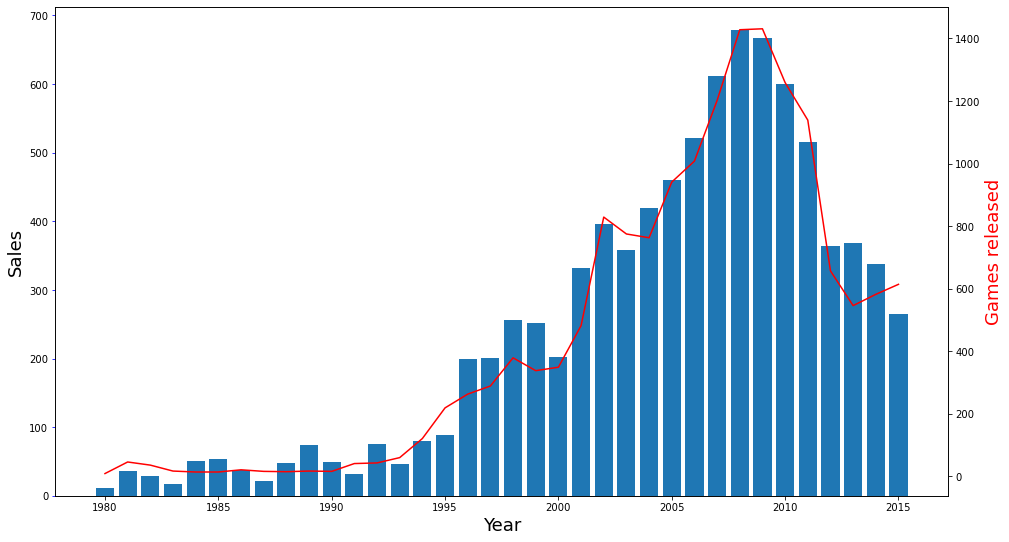

In [330]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(df_temp['year'], df_temp['sum'])
ax.set_ylabel('Sales', fontdict={'size': 18})
ax.set_xlabel('Year', fontdict={'size': 18})
ax.tick_params('y', color='blue') #set color of ticks 
ax2 = ax.twinx() #creates another plot on the same x axis
ax2.plot(df_temp['year'], df_temp['count'], color='red')
ax2.set_ylabel('Games released', color='red', fontdict={'size': 18})
plt.show()

The average number of sales per game in the first years of our dataset is quite high. That could be explained for the fact that we have a lot of classic games released before 1991, and these titles have sold an incredible amount of copies, as we can see below:

In [331]:
df[df['year'] < 1991].head(15)

,index,Rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
18,18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
21,21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
22,22,23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
89,89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
96,96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
127,127,128,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
155,155,156,Tetris,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58


If we plot the average number of units sold per game released per year, we can see how higher that number is for the first 10 years of our dataset:

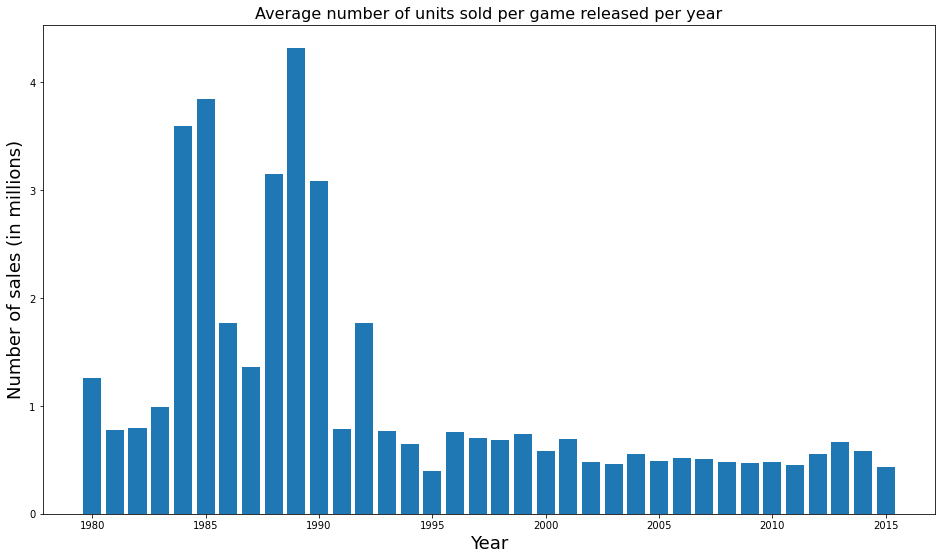

In [332]:
df_temp['avg_PY'] = round(df_temp['sum'] / df_temp['count'], 2)
plt.figure(figsize=(16,9))
plt.bar(df_temp['year'], df_temp['avg_PY'])
plt.xlabel('Year', fontdict={'size': 18})
plt.ylabel('Number of sales (in millions)', fontdict={'size': 18})
plt.title('Average number of units sold per game released per year', fontdict={'size': 16})
plt.show()

Which console has the highest number of games sold for its platform?

In [333]:
# Percentage of each platform sales
df_temp = df.groupby('platform')['global_sales'].agg(['sum', 'count', 'mean']).sort_values('sum', ascending=False).reset_index()# / df['global_sales'].sum() * 100
df_temp['pct_total_sales'] = round(df_temp['sum'] / df_temp['sum'].sum(), 4) * 100
df_temp.rename(columns={'sum': 'total_sales', 'count': 'games', 'mean': 'avg_per_game'}, inplace=True)
df_temp.head(15)

,platform,total_sales,games,avg_per_game,pct_total_sales
0,PS2,1233.46,2127,0.579906,14.10
1,X360,968.78,1227,0.789552,11.07
2,PS3,946.76,1272,0.744308,10.82
3,Wii,909.81,1290,0.705279,10.40
4,DS,818.67,2132,0.383992,9.36
5,PS,727.39,1189,0.611766,8.31
6,GBA,313.56,811,0.386634,3.58
7,PSP,291.71,1197,0.243701,3.33
8,GB,254.42,97,2.622887,2.91
9,PC,252.45,905,0.278950,2.89


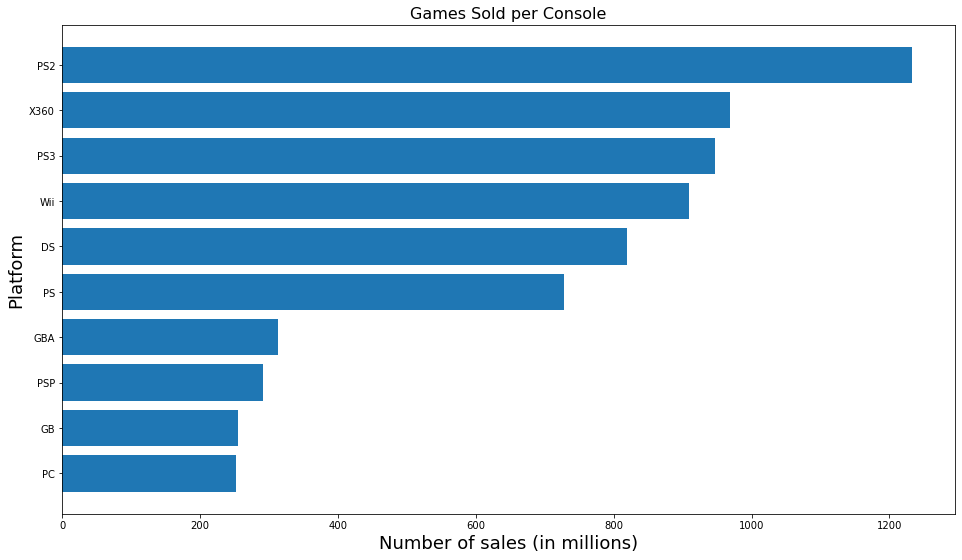

In [336]:
plt.figure(figsize=(16,9))
plt.barh(df_temp['platform'].head(10), df_temp['total_sales'].head(10))
plt.gca().invert_yaxis()
plt.xlabel('Number of sales (in millions)', fontdict={'size': 18})
plt.ylabel('Platform', fontdict={'size': 18})
plt.title('Games Sold per Console', fontdict={'size': 16})
plt.show()

Interesting to see that the PlayStation 2 has a very confortable 4% "lead", while the next 5 consoles have similar numbers, dropping down significantly after them to 3% and lower.

However, if we look at the average number of sales per game released, we see that there 2 consoles that are very much above the rest:

In [337]:
df_temp.sort_values('avg_per_game', ascending=False).head(5)

,platform,total_sales,games,avg_per_game,pct_total_sales
8,GB,254.42,97,2.622887,2.91
11,NES,251.07,98,2.561939,2.87
22,GEN,28.36,27,1.050370,0.32
13,PS4,238.82,228,1.047456,2.73
15,SNES,200.05,239,0.837029,2.29


If we look at the games sold on these consoles, we can understand why. Mario and the Pokémon series are two of the most popular gaming franchises ever, and we can see how many sales they have below:

In [263]:
df[(df['platform'] == 'GB') | (df['platform'] == 'NES')].head(10)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
23,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18


If we look at the different game genres, we see how the top 4 genres represent 55% of all video game sales, and action and sports game are even further separated from the rest of, totaling 35% between them.

In [347]:
# Percentage of each genre sales
df_temp = df.groupby('genre')['global_sales'].agg(['sum']).sort_values('sum', ascending=False).reset_index()
df_temp.rename(columns={'sum': 'total_sales'}, inplace=True)
df_temp['pct_total_sales'] = round(df_temp['total_sales'] / df_temp['total_sales'].sum(), 4) * 100
df_temp
# only 4 genres hold 55% of all sales revenue

,genre,total_sales,pct_total_sales
0,Action,1702.96,19.46
1,Sports,1294.64,14.80
2,Shooter,1007.98,11.52
3,Role-Playing,917.04,10.48
4,Platform,827.08,9.45
5,Misc,796.45,9.10
6,Racing,725.13,8.29
7,Fighting,440.19,5.03
8,Simulation,389.48,4.45
9,Puzzle,242.22,2.77


Now, lets look at the most popular games globally. We can see that Wii Sports has a very strong lead, followed by Grand Theft Auto V.

In [286]:
df.groupby('name')[['name', 'global_sales']].sum().sort_values('global_sales', ascending=False).reset_index().head(15)

,name,global_sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Black Ops,31.03
8,Call of Duty: Modern Warfare 3,30.83
9,New Super Mario Bros.,30.01


In [311]:
df.sort_values('jp_sales', ascending=False).head(10)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27
28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30


In [303]:
df

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [299]:
df_temp = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index().rename(columns={'index': 'region', 0:'sales'})
df_temp['pct'] = round(df_temp['sales'] / df_temp['sales'].sum(), 4) * 100
df_temp

,region,sales,pct
0,na_sales,4392.95,49.27
1,eu_sales,2434.13,27.30
2,jp_sales,1291.02,14.48
3,other_sales,797.75,8.95


In [48]:
df.groupby('name')[['name', 'global_sales']].sum().sort_values('global_sales', ascending=False).reset_index().head(20)

,name,global_sales
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Black Ops,31.03
8,Call of Duty: Modern Warfare 3,30.83
9,New Super Mario Bros.,30.01


In [4]:
# Percentage of each genre sales
df.groupby('genre')['global_sales'].agg(['sum']).sort_values('sum', ascending=False) / df['global_sales'].sum() * 100
# only 4 genres hold 55% of all sales revenue

,sum
genre,
Action,19.631094
Sports,14.920004
Shooter,11.629135
Role-Playing,10.396012
Platform,9.319832
Misc,9.079821
Racing,8.206322
Fighting,5.032375
Simulation,4.396644


In [6]:
# Percentage of each platform sales
df.groupby('platform')['global_sales'].agg(['sum']).sort_values('sum', ascending=False)# / df['global_sales'].sum() * 100
# only 3 genres hold 45% of all sales

,sum
platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


In [ ]:
# Percentage of each platform sales
df.groupby('platform')['global_sales'].agg(['count']).sort_values('count', ascending=False) / df['global_sales'].count() * 100
# only 3 genres hold 45% of all sales

,count
platform,
DS,13.031691
PS2,13.019641
PS3,8.006989
Wii,7.982890
X360,7.621400
PSP,7.308109
PS,7.205687
PC,5.783829
XB,4.964454


In [43]:
df_multiple_platforms = df.groupby('name')[['platform']].count().reset_index().query('platform > 1')
df_multiple_platforms

,name,platform
12,007: Quantum of Solace,6
13,007: The World is not Enough,2
28,11eyes: CrossOver,2
34,18 Wheeler: American Pro Trucker,2
37,187: Ride or Die,2
...,...,...
11478,iCarly,2
11479,iCarly 2: iJoin The Click!,2
11483,nail'd,2
11484,pro evolution soccer 2011,6


# Insights:
Most popular games by region and global
Most popular genres
Most popular because more games? avg units sold per game
Most popular publisher
Sales per year
Most Sales by Console
Best console for each Publisher